# Machine learning - Breast Cancer Diagnostic: Benign or Malignant - SVM
## Alhussain Almarhabi

In [47]:
import numpy as np 
import pandas as pd

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv('Cancer_UCI.csv')
dfc = df.drop(['id','Unnamed: 32'],axis=1)

In [50]:
df.head(2)
dfc.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


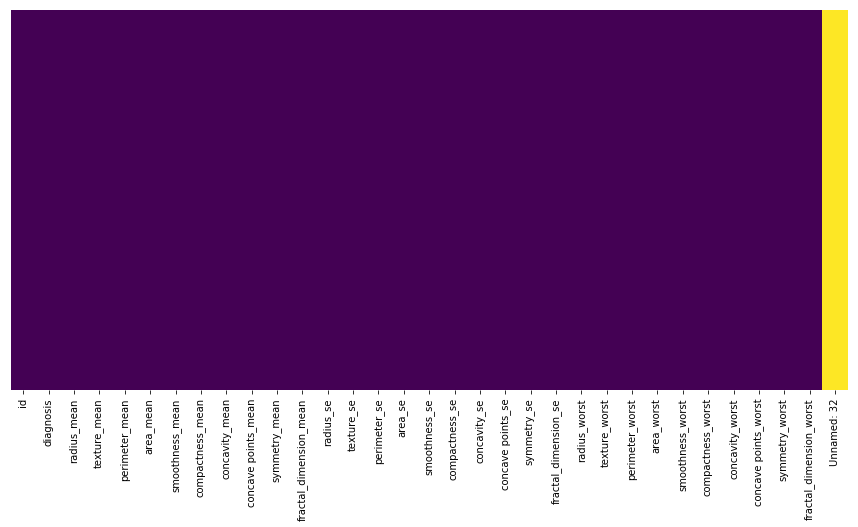

In [51]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [52]:
pp = df.describe()
pp.transpose()#.head(5)

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [54]:
#df_mean.corr(method='pearson')

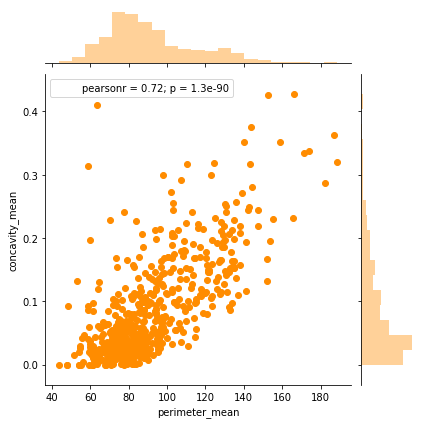

In [55]:
sns.jointplot(x='perimeter_mean',y='concavity_mean',data=df,kind='scatter'\
              ,color='darkorange')

# dividing the featurs into three group
## mean, standard deviation and worst of the cells

In [56]:
labels_mean = ['diagnosis','radius_mean','texture_mean','perimeter_mean',\
               'area_mean','smoothness_mean','compactness_mean',\
               'concavity_mean','concave points_mean','symmetry_mean',\
               'fractal_dimension_mean']

labels_se = ['diagnosis','radius_se','texture_se','perimeter_se','area_se',\
             'smoothness_se','compactness_se','concavity_se',\
            'concave points_se','symmetry_se','fractal_dimension_se']

labels_worst = ['diagnosis','radius_worst','texture_worst','perimeter_worst',\
                'area_worst','smoothness_worst','compactness_worst',\
                'concavity_worst','concave points_worst','symmetry_worst',\
                'fractal_dimension_worst']
# index label and classification 
'''
id                         569 non-null int64
diagnosis                  569 non-null object
'''
# mean label summary 
'''
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
'''
#df_mean = df.iloc[:,1:12]
df_mean = df[labels_mean]

# standard deviation label summary 
'''
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 non-null float64
fractal_dimension_se       569 non-null float64
'''

df_se = df[labels_se]

# worst or largest label summary 
'''
radius_worst               569 non-null float64
texture_worst              569 non-null float64
perimeter_worst            569 non-null float64
area_worst                 569 non-null float64
smoothness_worst           569 non-null float64
compactness_worst          569 non-null float64
concavity_worst            569 non-null float64
concave points_worst       569 non-null float64
symmetry_worst             569 non-null float64
fractal_dimension_worst    569 non-null float64
'''
df_worst = df[labels_worst]

# preview the divided data

In [57]:
df_mean.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


In [58]:
df_se.head(3)

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,M,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571


In [59]:
df_worst.head(3)

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [60]:
# count B and M for mean groupped
#sns.countplot(x='diagnosis',data=df_mean)

In [61]:
# count for standard deviation groupped
#sns.countplot(x='diagnosis', data=df_se)

In [62]:
# count for worst groupped
#sns.countplot(x='diagnosis', data=df_worst)

In [63]:
dfc.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [64]:
'''
does not effect our result if we made it dummies
Diagnosis = pd.get_dummies(dfc['diagnosis'], drop_first=True)


and we removing the first columns in dumies to solve common
problem in statistics known as multicollinearity.

# Add the dummies to dataframe
dfc = pd.concat([dfc,Diagnosis], axis=1)
dfc.head(2)

now since we encode the diagnosis we can delelt
the string columns

dfc.drop('diagnosis', axis=1, inplace=True)
dfc.head(2)
''';

In [65]:
# we want to standarize the data before using KNN - dfc : dataframe name
from sklearn.preprocessing import StandardScaler

In [66]:
# creat instant for scaler as you make model for machine learning 
scaler = StandardScaler()

In [67]:
# fit the model
scaler.fit(dfc.drop('diagnosis', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
scaled_features = scaler.transform(dfc.drop('diagnosis', axis=1))

In [70]:
scaled_features

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [71]:
# how to list dataframe columns name and how to delete the last col.
#dfc.columns show all
dfc.columns[1:]


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [72]:
df_feat = pd.DataFrame(scaled_features, columns=dfc.columns[1:])

In [73]:
# now we can we that the standrized features is in dataframe
df_feat.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [74]:
from sklearn.cross_validation import train_test_split

In [171]:
# divide the data 70% train and 30% test
X = df_feat
y = dfc['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [172]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [173]:
model4 = SVC()

In [174]:
model4.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
pred = model4.predict(X_test)

In [176]:
pred

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [177]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
accuracy_score(y_test,pred)

[[104   1]
 [  3  63]]


             precision    recall  f1-score   support

          B       0.97      0.99      0.98       105
          M       0.98      0.95      0.97        66

avg / total       0.98      0.98      0.98       171



0.97660818713450293

In [178]:
from sklearn.grid_search import GridSearchCV 

In [179]:
# we will use dictionary her 
param_grid4 = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [180]:
# GridSearchCV(youmodel, list of param you want to check, 
# verbose is number of show output so you don't end in loop
# also refit which by default true to fit model again
# after fitting it )
grid4 = GridSearchCV(SVC(),param_grid=param_grid4,verbose=3)

In [181]:
grid4.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.909774 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.917293 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.931818 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.932331 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.962406 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.984848 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.962406 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.984962 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.977273 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.969925 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [182]:
grid4.best_params_

{'C': 100, 'gamma': 0.0001}

In [183]:
grid4.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [184]:
'''grid4 = SVC(C=1000,gamma=0.0001)
grid4.fit(X_train,y_train)'''

'grid4 = SVC(C=1000,gamma=0.0001)\ngrid4.fit(X_train,y_train)'

In [185]:
grid_pred = grid4.predict(X_test)

In [186]:
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))
accuracy_score(y_test,grid_pred)

[[105   0]
 [  6  60]]


             precision    recall  f1-score   support

          B       0.95      1.00      0.97       105
          M       1.00      0.91      0.95        66

avg / total       0.97      0.96      0.96       171



0.96491228070175439

In [187]:
grid4

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [188]:
from sklearn.metrics import accuracy_score

In [189]:
accuracy_score(y_test,grid_pred)

0.96491228070175439

# Mean group - SVM

In [199]:

# creat instant for scaler as you make model for machine learning 
scaler1 = StandardScaler()

# fit standarScaler to your features but after dropping
# the categorical 
scaler1.fit(df_mean.drop('diagnosis', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_features1 = scaler1.transform(df_mean.drop('diagnosis', axis=1))

scaled_features1

#know I want to make this standrized feature into Dataframe

# how to list dataframe columns name and how to delete the last col.
#df.columns show all

df_feat1 = pd.DataFrame(scaled_features1, columns=df_mean.columns[1:])

#df_feat.head()

X1 = df_feat1
y1 = df_mean['diagnosis']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=101)

model1 = SVC()

model1.fit(X_train1,y_train1)

pred1 = model1.predict(X_test1)

print(confusion_matrix(y_test1,pred1))
print('\n')
print(classification_report(y_test1,pred1))
accuracy_score(y_test1,pred1)

[[102   3]
 [  8  58]]


             precision    recall  f1-score   support

          B       0.93      0.97      0.95       105
          M       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



0.93567251461988299

In [191]:
grid1 = GridSearchCV(SVC(),param_grid=param_grid4,verbose=3)
grid1.fit(X_train1,y_train1)
print(grid1.best_params_)
print(grid1.best_estimator_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.909774 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.962406 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.962121 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.977444 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.969697 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.902256 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.977444 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.954545 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.909774 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.969925 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


In [201]:
grid1.best_params_

{'C': 1, 'gamma': 0.1}

In [192]:
grid_pred1 = grid1.predict(X_test1)
print(confusion_matrix(y_test1,grid_pred1))
print('\n')
print(classification_report(y_test1,grid_pred1))
accuracy_score(y_test1,grid_pred1)

[[102   3]
 [  8  58]]


             precision    recall  f1-score   support

          B       0.93      0.97      0.95       105
          M       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



0.93567251461988299

# Standard error SVM

In [193]:

# creat instant for scaler as you make model for machine learning 
scaler2 = StandardScaler()

# fit standarScaler to your features but after dropping
# the categorical 
scaler2.fit(df_se.drop('diagnosis', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_features2 = scaler2.transform(df_se.drop('diagnosis', axis=1))

scaled_features2

#know I want to make this standrized feature into Dataframe

# how to list dataframe columns name and how to delete the last col.
#df.columns show all

df_feat2 = pd.DataFrame(scaled_features2, columns=df_se.columns[1:])

#df_feat.head()

X2 = df_feat2
y2 = df_se['diagnosis']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=101)

model2 = SVC()

model2.fit(X_train2,y_train2)

pred2 = model2.predict(X_test2)

print(confusion_matrix(y_test2,pred2))
print('\n')
print(classification_report(y_test2,pred2))
accuracy_score(y_test2,grid_pred2)


[[96  9]
 [15 51]]


             precision    recall  f1-score   support

          B       0.86      0.91      0.89       105
          M       0.85      0.77      0.81        66

avg / total       0.86      0.86      0.86       171



0.87134502923976609

In [194]:
grid2 = GridSearchCV(SVC(),param_grid=param_grid4,verbose=3)
grid2.fit(X_train2,y_train2)
print(grid2.best_params_)
print(grid2.best_estimator_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.812030 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.804511 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.833333 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.751880 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.734848 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.864662 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.894737 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.871212 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.902256 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.924812 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


In [202]:
grid2.best_params_

{'C': 100, 'gamma': 0.01}

In [195]:
grid_pred2 = grid2.predict(X_test2)
print(confusion_matrix(y_test2,grid_pred2))
print('\n')
print(classification_report(y_test2,grid_pred2))
accuracy_score(y_test2,grid_pred2)

[[95 10]
 [12 54]]


             precision    recall  f1-score   support

          B       0.89      0.90      0.90       105
          M       0.84      0.82      0.83        66

avg / total       0.87      0.87      0.87       171



0.87134502923976609

# Worst group SVM

In [196]:

# creat instant for scaler as you make model for machine learning 
scaler3 = StandardScaler()

# fit standarScaler to your features but after dropping
# the categorical 
scaler3.fit(df_worst.drop('diagnosis', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_features3 = scaler3.transform(df_se.drop('diagnosis', axis=1))

scaled_features3

#know I want to make this standrized feature into Dataframe

# how to list dataframe columns name and how to delete the last col.
#df.columns show all

df_feat3 = pd.DataFrame(scaled_features3, columns=df_worst.columns[1:])

#df_feat.head()

X3 = df_feat3
y3 = df_worst['diagnosis']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=101)

model3 = SVC()

model3.fit(X_train3,y_train3)

pred3 = model3.predict(X_test3)

print(confusion_matrix(y_test3,pred3))
print('\n')
print(classification_report(y_test3,pred3))
accuracy_score(y_test3,grid_pred3)

[[105   0]
 [ 52  14]]


             precision    recall  f1-score   support

          B       0.67      1.00      0.80       105
          M       1.00      0.21      0.35        66

avg / total       0.80      0.70      0.63       171



0.88304093567251463

In [197]:
grid3 = GridSearchCV(SVC(),param_grid=param_grid4,verbose=3)
grid3.fit(X_train3,y_train3)
print(grid3.best_params_)
print(grid3.best_estimator_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.643939 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=100, gamma=0.1, score=0.902256 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.825758 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.796992 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.849624 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.833333 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.646617 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.639098 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


In [203]:
grid3.best_params_

{'C': 1000, 'gamma': 1}

In [198]:
grid_pred3 = grid3.predict(X_test3)
print(confusion_matrix(y_test3,grid_pred3))
print('\n')
print(classification_report(y_test3,grid_pred3))
accuracy_score(y_test3,grid_pred3)

[[100   5]
 [ 15  51]]


             precision    recall  f1-score   support

          B       0.87      0.95      0.91       105
          M       0.91      0.77      0.84        66

avg / total       0.89      0.88      0.88       171



0.88304093567251463